In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#seperate by dependent and independ features
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
X = df.iloc[:,3:13]

In [ ]:
Y = df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)
geography = geography.astype(int)
gender = gender.astype(int)

# Combine these with the original dataset (excluding the original 'Geography' and 'Gender' columns)
X = pd.concat([X.drop(['Geography', 'Gender'], axis=1), geography, gender], axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#Create ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [ ]:
#initialize ANN
classifier = Sequential()

In [ ]:
#Adding input layer(input is 11-(8000, 11))
classifier.add(Dense(units=11, activation='relu',))

In [ ]:
#Adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#Adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#Adding output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics= ['accuracy'])

In [ ]:
import keras

In [ ]:
call_back =keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=1000,validation_split=0.33,callbacks=call_back )

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7963 - loss: 0.6353 - val_accuracy: 0.8542 - val_loss: 0.4404
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8569 - loss: 0.4280 - val_accuracy: 0.8573 - val_loss: 0.3836
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8549 - loss: 0.4022 - val_accuracy: 0.8550 - val_loss: 0.3745
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8625 - loss: 0.3735 - val_accuracy: 0.8519 - val_loss: 0.3731
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.3762 - val_accuracy: 0.8493 - val_loss: 0.3733
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8562 - loss: 0.3701 - val_accuracy: 0.8493 - val_loss: 0.3682
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8632 - loss: 0.3532 - val_accuracy: 0.8501 - val_loss: 0.3662
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8575 - loss: 0.3590 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
import matplotlib.pyplot as plt


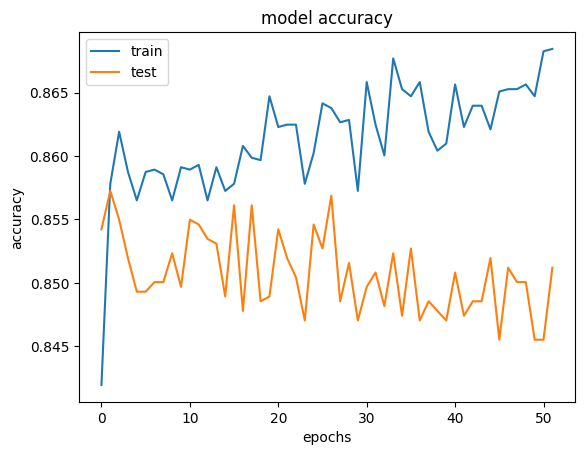

In [ ]:
#summerize history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()



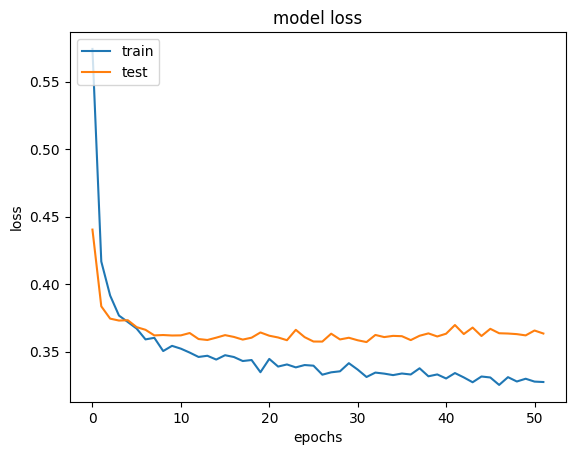

In [ ]:
#summerize history
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()



In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
#Prediction
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred = (y_pred >= 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1534,   61],
       [ 219,  186]])

In [ ]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.86

In [ ]:
#Get weights
classifier.get_weights()

[array([[ 0.17333443,  0.15268162, -0.09732236, -0.00805196,  0.55475754,
          0.04200803, -0.11981957,  0.19063902,  0.01817953,  0.06582138,
         -0.04202048],
        [ 0.15154774,  0.41603243, -0.81987214, -0.08600656, -0.6909563 ,
          0.55627906,  0.6001019 , -0.80187744, -0.32349813,  0.20031643,
         -1.0700133 ],
        [-0.07879689,  0.2633841 ,  0.30994862,  0.19705883, -0.15497378,
          0.11828785,  0.13489825,  0.05020706,  0.37258413,  0.14430533,
         -0.04851982],
        [ 0.19881374, -0.65841264,  0.17424905, -0.9084745 , -0.1325218 ,
          0.03467729, -0.21062167, -0.0118305 ,  0.21750057,  0.17507215,
         -0.06371799],
        [-1.0358291 , -0.17298712, -0.037952  , -1.2244521 , -0.44873196,
         -0.28240985, -0.42935354, -0.18873551, -0.7304522 ,  1.0071124 ,
         -0.15387896],
        [-0.08387227, -0.07873426, -0.1234542 ,  0.01280102,  0.40093148,
          0.24097534,  0.06973836, -0.07526327,  0.6012916 , -0.1083525